In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression

# giving file path and opening dataframe
file = 'Blood Transfusion/data.csv'
df = pd.read_csv(file, sep=',', header=0, on_bad_lines='skip')

In [5]:
# Setting up arrays for testing and training 
X = df.values[:, 0:3]
Y = df.values[:, 4]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [6]:
#Entropy model
entropy = DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=2,min_samples_leaf=1)
entropy.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [7]:
#Logistic Regression Model
LR_model = LogisticRegression(penalty='l2',C=1)
LR_model.fit(X_train,Y_train)

LogisticRegression(C=1)

In [8]:
# The values for these models has already been optimized for f1_score using GridsearchCV

In [9]:
#Predicting Models
y_pred = entropy.predict(X_test)
lr_pred = LR_model.predict(X_test)

In [15]:
# Metrics for Decision Tree
a_entropy = accuracy_score(Y_test, y_pred) * 100
f1_entropy = f1_score(Y_test, y_pred)

# Cross-validation for Decision Tree
cross_entropy = cross_val_score(entropy, X, Y, cv=5, scoring='accuracy')
mean_cv_entropy = np.mean(cross_entropy)

# Metrics for Logistic Regression
a_LR = accuracy_score(Y_test,lr_pred) * 100
f1_LR = f1_score(Y_test,lr_pred)

# Cross-validation for Logistic Regression
cross_LR = cross_val_score(LR_model, X_train, Y_train, cv=5, scoring='accuracy')
mean_cv_LR = np.mean(cross_LR)

In [16]:
print('The Accuracy Score for Decision Tree Model :', a_entropy)
print('The Accuracy Score for Logistic Regression Model :', a_LR)

The Accuracy Score for Decision Tree Model : 72.0
The Accuracy Score for Logistic Regression Model : 78.0


In [17]:
print('The f1 score for Decision Tree Model:', f1_entropy)
print('The f1 score for Logistic Regression Model:', f1_LR)

The f1 score for Decision Tree Model: 0.46153846153846156
The f1 score for Logistic Regression Model: 0.15384615384615385


In [18]:
print('The Cross Value score for accuracy for Decision Tree Model :', mean_cv_entropy)
print('The Cross Value score for accuracy for Logistic Regression Model:', mean_cv_LR)

The Cross Value score for accuracy for Decision Tree Model : 0.708599552572707
The Cross Value score for accuracy for Logistic Regression Model: 0.767563025210084


C:\Users\ST\AppData\Local\Temp\ipykernel_8012\2055666636.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=ax[0], palette='viridis')
C:\Users\ST\AppData\Local\Temp\ipykernel_8012\2055666636.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=metrics_df, ax=ax[1], palette='viridis')
C:\Users\ST\AppData\Local\Temp\ipykernel_8012\2055666636.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Cross-Val Score', data=metrics_df, ax=ax[2], palette='viridis

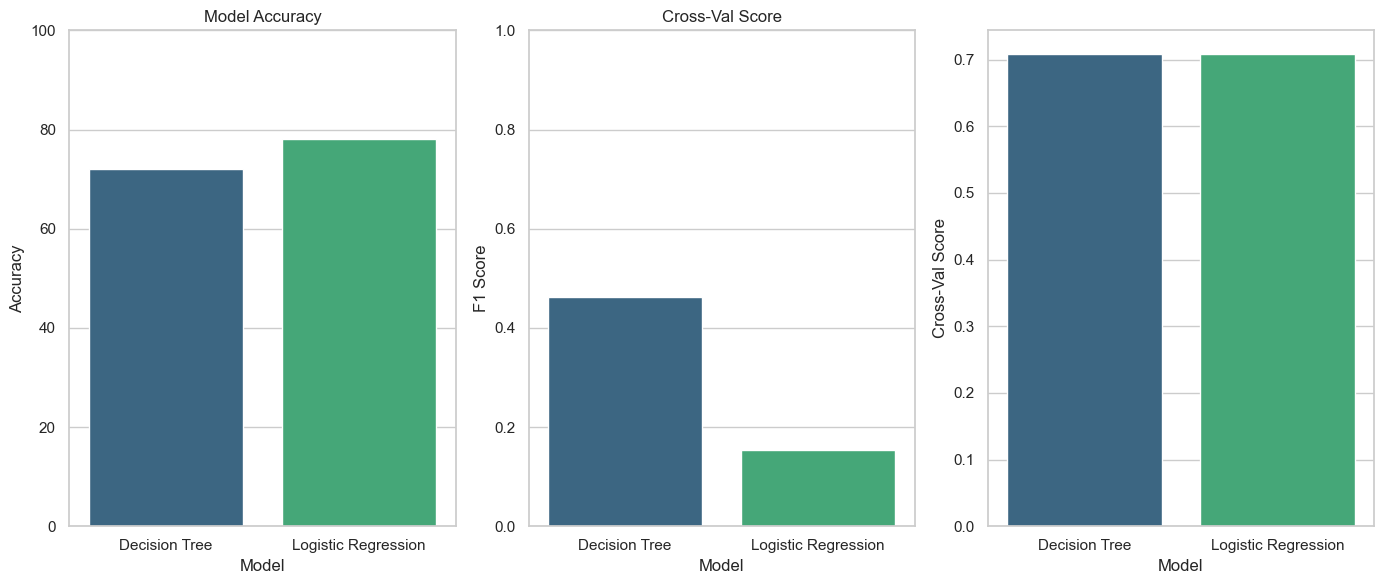

In [19]:
# Prepare data for plotting
model_names = ['Decision Tree', 'Logistic Regression']
accuracy_scores = [a_entropy, a_LR]
f1_scores = [f1_entropy, f1_LR]
cross_val = [mean_cv_entropy,mean_cv_entropy]

metrics_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Cross-Val Score' : cross_val
})

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# Bar plot for accuracy scores
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=ax[0], palette='viridis')
ax[0].set_title('Model Accuracy')
ax[0].set_ylim(0, 100)  # Set y-axis limit from 0 to 100 (for accuracy)

# Bar plot for F1 scores
sns.barplot(x='Model', y='F1 Score', data=metrics_df, ax=ax[1], palette='viridis')
ax[1].set_title('Model F1 Score')
ax[1].set_ylim(0, 1)  # Set y-axis limit from 0 to 1 (for F1 Score)

sns.barplot(x='Model', y='Cross-Val Score', data=metrics_df, ax=ax[2], palette='viridis')
ax[1].set_title('Cross-Val Score')
ax[1].set_ylim(0, 1)

# Show the plots
plt.tight_layout()
plt.show()